In [12]:
import numpy as np
import scipy.stats as st
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
X = np.random.normal(loc=13.5, scale=6.85, size=600)
X = np.round(X, 0)

absfreq, bins = np.histogram(X, bins=range(-20, 50))

N = sum(absfreq)
relfreq = np.cumsum(absfreq/N)

k = bins[:-1]

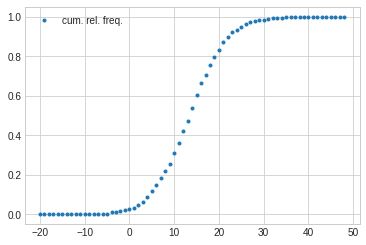

In [70]:
plt.plot(k, relfreq, 'o', ms=3, label='cum. rel. freq.');
plt.legend();

### least square method

[13.33132322  6.87899973]


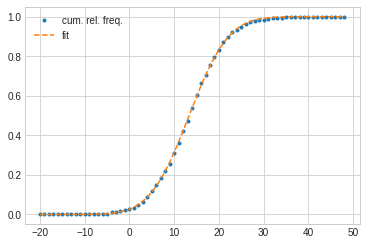

In [71]:
def residu(vec):
    mu, s = vec
    return st.norm.cdf(k, loc=mu, scale=s) - relfreq

lsqsol = opt.least_squares(residu, [13, 6])
print (lsqsol.x)
mu, s = lsqsol.x

plt.plot(k, relfreq, 'o', ms=3, label='cum. rel. freq.');


x = np.linspace(min(k), max(k))
y = st.norm.cdf(x, loc=mu, scale=s)
plt.plot(x, y, '--', label='fit');


plt.legend();

### minimize method

In [85]:
def model(vec):
    return np.sum(residu(vec)**2)

minmodel = opt.minimize(model, [13, 6])
print (minmodel.x)
print (np.sum(residu(minmodel.x)**2))


[13.33131076  6.87899791]
0.0011497198483766261


### curve fit

In [83]:
def func(k, mu,s):
    return st.norm.cdf(k, loc=mu, scale=s)

params, _ = opt.curve_fit(func, k, relfreq, [13,6])
print (params)
print (np.sum(residu(params)**2))

[13.33132322  6.87899973]
0.0011497198418555354


### distribution fit

In [82]:
mufit, sfit = st.norm.fit(X)
print (mufit, sfit)
print (np.sum(residu([mufit,sfit])**2))

13.876666666666667 7.010096686605368
0.013552821039265606
